# Fifty One and Pytorch Installation

In [ ]:
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 15.6 MB/s 
     |████████████████████████████████| 57 kB 6.4 MB/s 
     |████████████████████████████████| 226 kB 76.7 MB/s 
     |████████████████████████████████| 192 kB 53.0 MB/s 
     |████████████████████████████████| 132 kB 77.5 MB/s 
     |████████████████████████████████| 56 kB 6.1 MB/s 
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
     |████████████████████████████████| 63 kB 3.0 MB/s 
     |████████████████████████████████| 133 kB 74.6 MB/s 
     |████████████████████████████████| 108 kB 76.5 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 564 kB 82.4 MB/s 
     |████████████████████████████████| 37.8 MB 150 kB/s 
     |████████████████████████████████| 80 kB 12.3 MB/s 
     |████████████████████████████████| 202 kB 81.4 MB/s 
     |████████████████████████████████| 

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
import torch
import torchvision
from PIL import Image
from torchvision.transforms import functional
from fiftyone import ViewField

Migrating database to v0.18.0


INFO:fiftyone.migrations.runner:Migrating database to v0.18.0


# Load Dataset COCO 2017

In [ ]:
coco_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="evaluate-detections-tutorial",
)
coco_dataset.persistent = True

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [7.9s elapsed, 0s remaining, 274.5Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [7.9s elapsed, 0s remaining, 274.5Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [24.8s elapsed, 0s remaining, 243.2Mb/s]      


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [24.8s elapsed, 0s remaining, 243.2Mb/s]      


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [31.5s elapsed, 0s remaining, 181.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [31.5s elapsed, 0s remaining, 181.0 samples/s]      


Dataset 'evaluate-detections-tutorial' created


INFO:fiftyone.zoo.datasets:Dataset 'evaluate-detections-tutorial' created


In [ ]:
# Print some information about the dataset
print(coco_dataset)

Name:        evaluate-detections-tutorial
Media type:  image
Num samples: 5000
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
# Print a ground truth detection
dataset_sample = coco_dataset.first()
print(dataset_sample.ground_truth.detections[0])

<Detection: {
    'id': '63a650b9a2700a7acc4843bb',
    'attributes': {},
    'tags': [],
    'label': 'potted plant',
    'bounding_box': [
        0.37028125,
        0.3345305164319249,
        0.038593749999999996,
        0.16314553990610328,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'furniture',
    'iscrowd': 0,
}>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


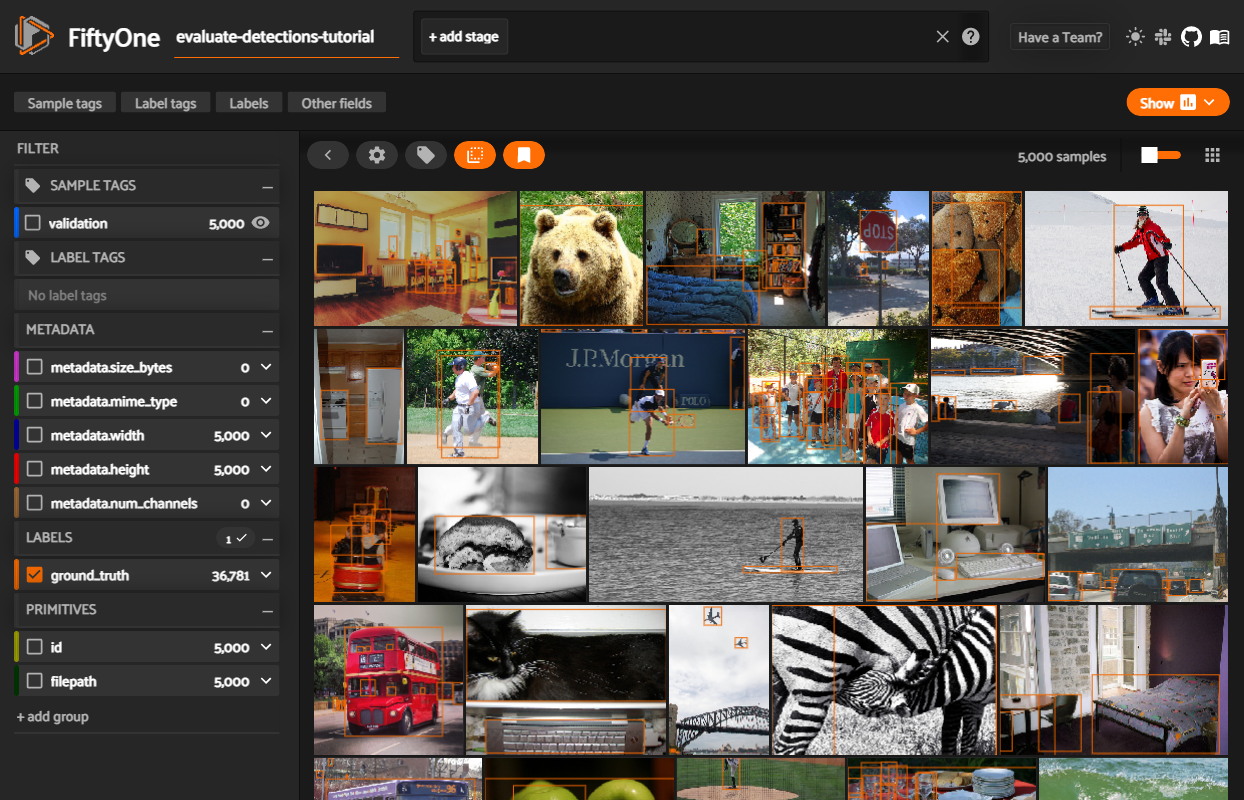

<IPython.core.display.Javascript object>

In [ ]:
session = fo.launch_app(coco_dataset)

# Load Model

In [ ]:
# Run the model on GPU if it is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load a pre-trained Faster R-CNN model
ssd_model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
ssd_model.to(device)
ssd_model.eval()

print("Models are ready")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth


  0%|          | 0.00/136M [00:00<?, ?B/s]

Models are ready


# Prediction

In [ ]:
ssd_pred = coco_dataset.take(5000)

In [ ]:
# Get class list
classes = coco_dataset.default_classes

In [ ]:
# Add predictions to samples
with fo.ProgressBar() as pb:
    for ssd_sample in pb(ssd_pred):
        # Load image
        image = Image.open(ssd_sample.filepath)
        image = functional.to_tensor(image).to(device)
        c, h, w = image.shape
        
        # Perform inference
        preds = ssd_model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()
        
        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )
        
        # Save predictions to dataset
        ssd_sample["ssd"] = fo.Detections(detections=detections)
        ssd_sample.save()

 100% |███████████████| 5000/5000 [12.5m elapsed, 0s remaining, 7.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [12.5m elapsed, 0s remaining, 7.2 samples/s]      


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


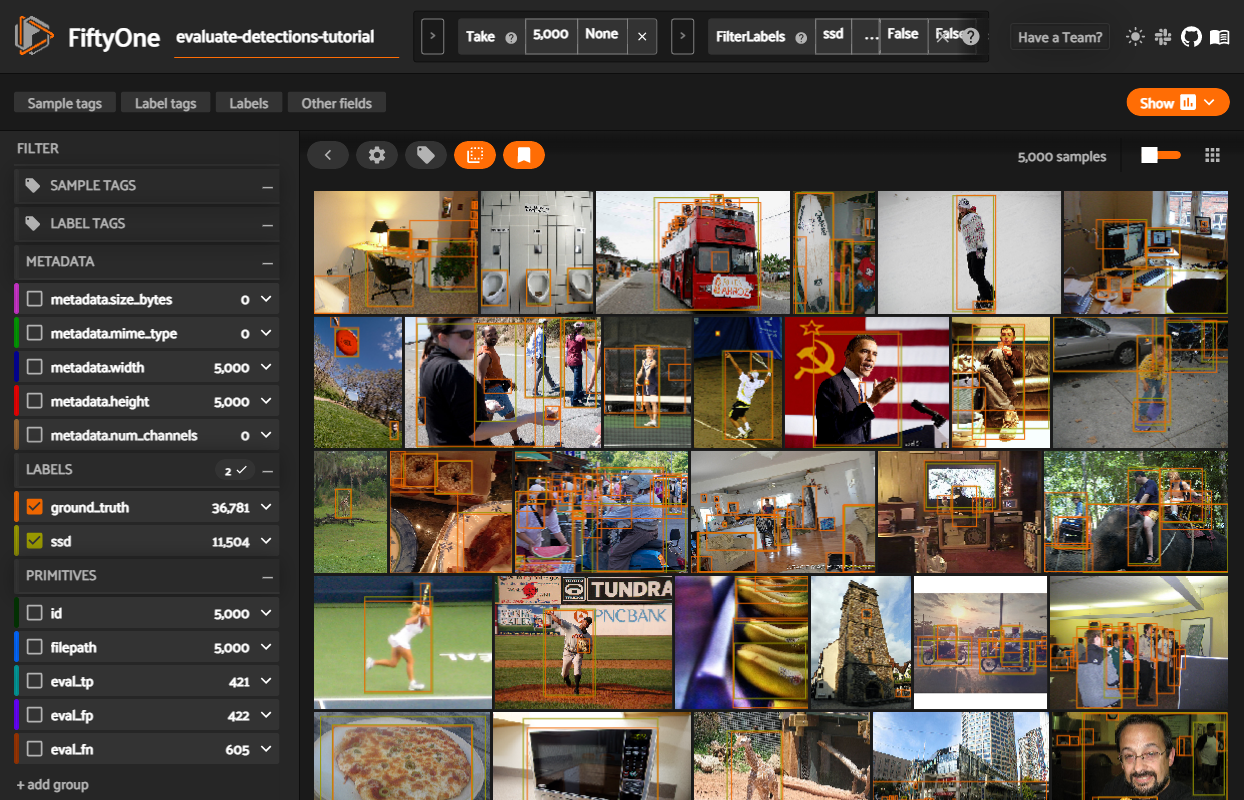

<IPython.core.display.Javascript object>

In [ ]:
session.show()

# Confidence Threshold

In [ ]:
# Only contains detections with confidence >= 0.5
conf_ssd = ssd_pred.filter_labels("ssd", ViewField("confidence") > 0.5, only_matches=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


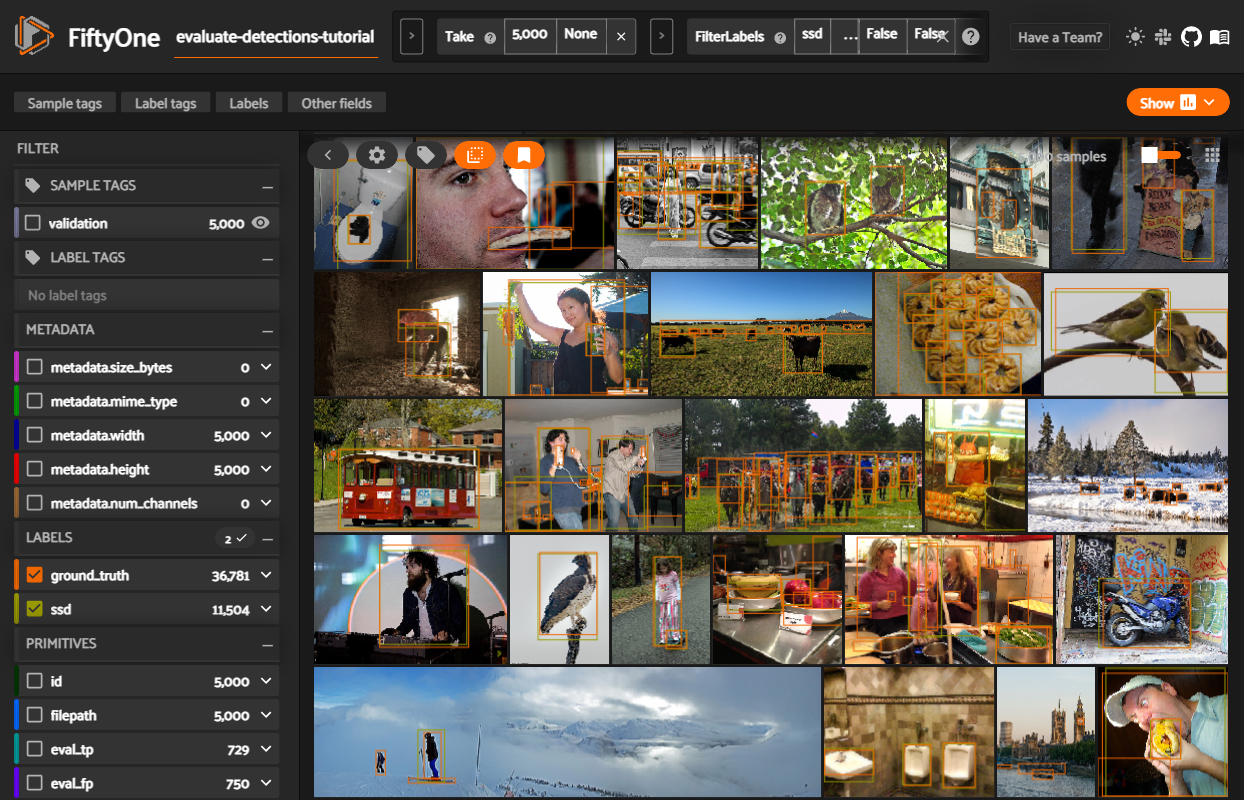

<IPython.core.display.Javascript object>

In [ ]:
session.view = conf_ssd

# ssd300_vgg16 Evaluation

In [ ]:
# Evaluate the predictions in the `ssd` field of our `high_conf_view`
# with respect to the objects in the `ground_truth` field
ssd_results = conf_ssd.evaluate_detections(
    "ssd",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [3.7m elapsed, 0s remaining, 57.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [3.7m elapsed, 0s remaining, 57.9 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.2m elapsed, 0s remaining, 95.6 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.2m elapsed, 0s remaining, 95.6 samples/s]       


In [ ]:
ious_ssd_sum = 0
for i in range(len(ssd_results.ious)):
  if ssd_results.ious[i] != None:
    ious_ssd_sum += ssd_results.ious[i]
ious_ssd_avg = ious_ssd_sum/len(ssd_results.ious)
print(ious_ssd_avg)

0.2216894081648328


In [ ]:
# Get the 10 most common classes in the dataset
ssd_counts = coco_dataset.count_values("ground_truth.detections.label")
ssd_classes_sorted = sorted(ssd_counts, key=ssd_counts.get, reverse=True)

# Print a classification report for the top-10 classes
ssd_results.print_report(classes = ssd_classes_sorted)

                precision    recall  f1-score   support

        person       0.94      0.40      0.56     11087
           car       0.87      0.21      0.34      1933
         chair       0.80      0.12      0.20      1791
          book       0.69      0.01      0.02      1162
        bottle       0.85      0.08      0.15      1025
           cup       0.78      0.15      0.26       899
  dining table       0.62      0.29      0.40       697
 traffic light       0.92      0.05      0.10       637
          bowl       0.79      0.24      0.37       626
       handbag       0.60      0.01      0.01       540
          bird       0.99      0.17      0.30       440
          boat       0.75      0.12      0.21       430
         truck       0.77      0.23      0.35       415
         bench       0.80      0.17      0.28       413
      umbrella       0.89      0.24      0.38       413
           cow       0.86      0.31      0.45       380
        banana       0.67      0.10      0.18  

In [ ]:
print(ssd_results.mAP())

0.18154592627348617


In [ ]:
plot = ssd_results.plot_pr_curves(classes=[
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
])
plot.show()

In [ ]:
ssd_sample = conf_ssd.first()
print(ssd_sample.ssd.detections[0])

<Detection: {
    'id': '63a650eea2700a7acc48e6f0',
    'attributes': {},
    'tags': [],
    'label': 'chair',
    'bounding_box': [
        0.31571881771087645,
        0.5033497174580892,
        0.28778188228607177,
        0.4273141543070475,
    ],
    'mask': None,
    'confidence': 0.9997695088386536,
    'index': None,
    'eval_iou': 0.9172157542203513,
    'eval_id': '63a650bba2700a7acc484ef1',
    'eval': 'tp',
}>


In [ ]:
ssd_eval_patches = coco_dataset.to_evaluation_patches("eval")
print(ssd_eval_patches)

Dataset:     evaluate-detections-tutorial
Media type:  image
Num patches: 1021912
Patch fields:
    id:           fiftyone.core.fields.ObjectIdField
    sample_id:    fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ssd:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:        fiftyone.core.fields.BooleanField
    type:         fiftyone.core.fields.StringField
    iou:          fiftyone.core.fields.FloatField
View stages:
    1. ToEvaluationPatches(eval_key='eval', config=None)


In [ ]:
session.view = ssd_eval_patches